**[Back to Fan's Intro Stat Table of Content](https://fanwangecon.github.io/Stat4Econ/)**

# Multiple Variables Basic Graphs and Tables

## Load Packages and Data

### Packages

We will continue to rely on various [tidyverse](https://www.tidyverse.org/). Now including: [ggplot](https://ggplot2.tidyverse.org/reference/ggplot.html), [readr](https://readr.tidyverse.org/), along with [dplyr](https://dplyr.tidyverse.org/) and [tibble](https://tibble.tidyverse.org/), which we used for the [in-class survey](https://fanwangecon.github.io/Stat4Econ/survey/classsurvey.html) already.

We will also use the [knitr](https://yihui.name/knitr/) Package, which allows for prettified outputs.

In [25]:
# For Data Manipulations
library(tidyverse)
# For Additional table output 
# install.packages("knitr")
library(knitr)

### Load File
Let's load in the dataset we created from the [in-class survey](https://fanwangecon.github.io/Stat4Econ/survey/classsurvey.html).

In [26]:
# Load the dataset using readr's read_csv
df_survey <- read_csv('../data/classsurvey.csv')

Parsed with column specification:
cols(
  ID = col_double(),
  ROW = col_double(),
  COL = col_double(),
  gender = col_character(),
  years.in.houston = col_double(),
  major = col_character(),
  commute = col_character(),
  games.attended = col_double(),
  games.any = col_character(),
  econ = col_character()
)


In [27]:
# We have several factor variables, we can set them as factor one by one
df_survey[['gender']] <- as.factor(df_survey[['gender']])
# But that is a little cumbersome, we can using lapply, a core function in r to do this for all factors
factor_col_names <- c('gender', 'major', 'commute', 'games.any', 'econ')
df_survey[factor_col_names] <- lapply(df_survey[factor_col_names], as.factor)
# Check Variable Types
str(df_survey)

Classes 'tbl_df', 'tbl' and 'data.frame':	10 obs. of  10 variables:
 $ ID              : num  1 2 3 4 5 6 7 8 9 10
 $ ROW             : num  3 4 4 4 2 1 2 3 3 4
 $ COL             : num  1 2 10 1 6 7 6 6 3 13
 $ gender          : Factor w/ 2 levels "FEMALE","MALE": 2 1 2 2 1 2 2 2 1 1
 $ years.in.houston: num  21 21 22 22 20 3 25 20 5 20
 $ major           : Factor w/ 5 levels "CONSUMERSCIENCE",..: 2 3 2 2 2 5 2 1 4 2
 $ commute         : Factor w/ 1 level "YES": 1 1 1 1 1 1 1 1 1 1
 $ games.attended  : num  0 2 0 14 0 0 25 2 0 0
 $ games.any       : Factor w/ 2 levels "Has.Attended",..: 2 1 2 1 2 2 1 1 2 2
 $ econ            : Factor w/ 2 levels "ECON","Not.Econ": 1 2 1 1 1 2 1 2 2 1
 - attr(*, "spec")=
  .. cols(
  ..   ID = col_double(),
  ..   ROW = col_double(),
  ..   COL = col_double(),
  ..   gender = col_character(),
  ..   years.in.houston = col_double(),
  ..   major = col_character(),
  ..   commute = col_character(),
  ..   games.attended = col_double(),
  ..   games.any =

## Two Continuous Variables

With two continuous/quantitative variables, we can generate a scatter plot. Crucially, each point of the scatter plot represents one individual, the location of that point indicates the x and y values of that individual. The x and y values could be the individual's test score and hours studied for example. 

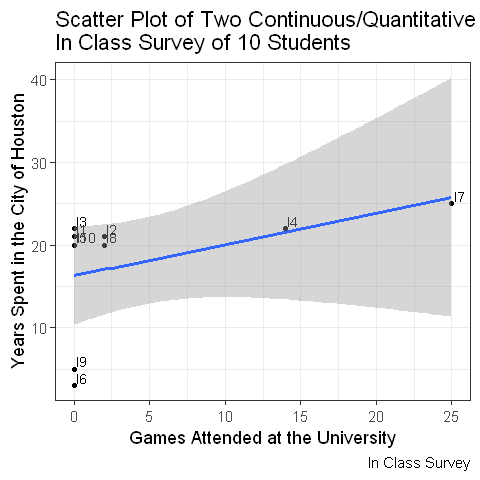

In [28]:
# We can draw a scatter plot for two continuous variables
# Control Graph Size
options(repr.plot.width = 4, repr.plot.height = 4)
# Draw Scatter Plot
# 1. specify x and y
# 2. label each individual by their ID, add letter I in front of value
# 3. add in trend line
scatter <- ggplot(df_survey, aes(x=games.attended, y=years.in.houston)) +
      geom_point(size=1) +      
      geom_text(aes(label=paste0('I', ID)), size=3, hjust=-.2, vjust=-.2) + 
      geom_smooth(method=lm) + # Trend line
      labs(title = paste0('Scatter Plot of Two Continuous/Quantitative Variables'
                          ,'\nIn Class Survey of 10 Students'),
           x = 'Games Attended at the University',
           y = 'Years Spent in the City of Houston',
           caption = 'In Class Survey') +
      theme_bw()
print(scatter)

## Two Categorical Variables
With two discrete/categorical variables, we can generate two-way frequency tables. This is very similar to what we did for one discrete variable, except now we have columns and rows, representing the categories of the two variables. The two variables could be gender and majors, we would write in each table cell the number of students who are male and econ majors, male and bio majors in for example the first column, and repeat this for girls in the second column. 

In [29]:
# We can tabulate Frequencies based on two categorical variables
df_survey %>%
  group_by(gender, econ) %>%
  summarize(freq = n()) %>% 
  spread(gender, freq)

econ,FEMALE,MALE
ECON,2,4
Not.Econ,2,2


In [30]:
# We can show the fraction of individuals in each of the four groups
df_survey %>%
  group_by(interaction(gender, econ)) %>%
  summarise(freq = n()) %>%
  mutate(fraction = freq / sum(freq))

"interaction(gender, econ)",freq,fraction
FEMALE.ECON,2,0.2
MALE.ECON,4,0.4
FEMALE.Not.Econ,2,0.2
MALE.Not.Econ,2,0.2


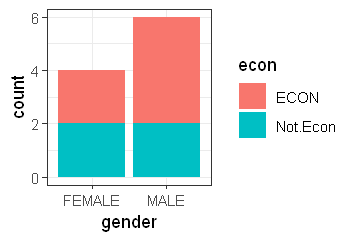

In [31]:
# We can create stacked bar charts as well with the same data
# graph size
options(repr.plot.width = 3, repr.plot.height = 2)
# Graph
stacked.bar.plot <- ggplot(df_survey) + 
    geom_bar(aes(x=gender, fill=econ)) + 
    theme_bw()
print(stacked.bar.plot)

## Continuous and Categorical Variable

### Average Across Groups
We can look at the average game attendance by female and male students in our sample, using a bar plot, where the height of the bars now represent the average of the *games.attended* variable for each group.

In [32]:
# We can first find the group averages
df_gender_avg_games <- df_survey %>%
                        group_by(gender) %>%
                        summarise (avg.games.attended = mean(games.attended)) 
df_gender_avg_games

gender,avg.games.attended
FEMALE,0.500000
MALE,6.833333


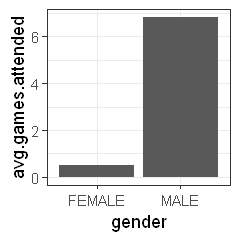

In [33]:
# We can graph based on df_gender_avg_games
# Sizing the Figure Here
options(repr.plot.width = 2, repr.plot.height = 2)
# Plot, stat = identity means to plot the value in avg.games.attended for each gender
group.means <- ggplot(df_gender_avg_games) + 
    geom_bar(aes(x=gender, y=avg.games.attended), stat = 'identity') + 
    theme_bw()
print(group.means)

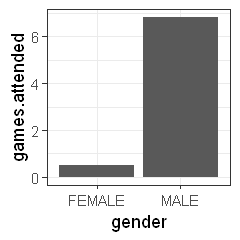

In [34]:
# But it is a little cumbersome to do this in two steps, we can do it in one step
# Sizing the Figure Here
options(repr.plot.width = 2, repr.plot.height = 2)
# Plot directly from df_survey, summary over x for y
# The result looks the same
group.means.joint <- ggplot(df_survey) + 
    geom_bar(aes(x=gender, y=games.attended), stat = "summary", fun.y = "mean") + 
    theme_bw()
print(group.means.joint)

### Average Across Two Groups: Gender and Majors
What is the average game attendance for male and female, econ and non-econ majors? We have 2 female econ majors, 2 female non-econ majors, 4 male econ majors and 2 male non-econ majors, and their average game attendances are: 0, 1, 9.75 and 1 games. 

In [35]:
# We can calculate the statistics as a table, and also show obs in each group
df_survey %>%
    group_by(gender, econ ) %>%
    summarise (avg.games.attended = mean(games.attended), N.count = n()) 

gender,econ,avg.games.attended,N.count
FEMALE,ECON,0.00,2
FEMALE,Not.Econ,1.00,2
MALE,ECON,9.75,4
MALE,Not.Econ,1.00,2


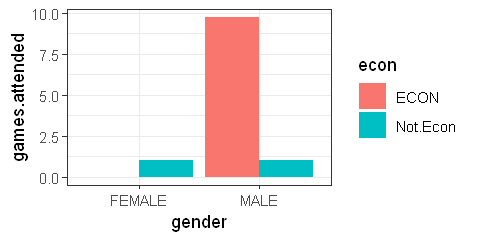

In [36]:
# Let's Show these Visually
options(repr.plot.width = 4, repr.plot.height = 2)
# Plot directly from df_survey
# Using fill for econ, this means econ or not will fill up with different colors
# Still caculate average
# Postion "dodge" means that econ and non-econ wil be shown next to each other
# By default position is to stack different fill groups on top of each other.
two.group.means <- ggplot(df_survey) + 
    geom_bar(aes(x=gender, y=games.attended, fill=econ),
             stat = "summary", fun.y = "mean", position = "dodge") + 
    theme_bw()
print(two.group.means)